In [1]:
import os 
from datetime import datetime
import ubiops
from dotenv import load_dotenv
import requests
import json 

# Enter your API token here
load_dotenv(".env")

client = ubiops.ApiClient(ubiops.Configuration(
	host="https://api.ubiops.com/v2.1",
	api_key={"Authorization": os.environ["TOKEN_RAYCAST_USER"]})
)

api = ubiops.CoreApi(client)

ref_datetime = datetime.strptime("2024-06-20 06:30:00", "%Y-%m-%d %H:%M:%S")

In [2]:
def raycast_data_by_query(
    token: str,
    ref_datetime: datetime
):
    file_name = f"irradiance_{ref_datetime.strftime('%Y%m%dT%H%M%S')}.nc"
    resp = requests.get(
        url=f"https://api.ubiops.com/v2.1/projects/raycast-development/buckets/predictions/files/{file_name}/download", 
        headers={'Authorization': f'{token}'}
    )

    data = json.loads(resp.content)

    receive_file = requests.get(url=data["url"], stream=True)
    data = receive_file.raw.read(decode_content=True)
    
    if resp.status_code == 200:
        with open(file_name, "wb") as f:
            f.write(data)
    else: 
        print(resp.status_code)
    return 

In [3]:
raycast_data_by_query(token=os.environ["TOKEN_RAYCAST_USER"], ref_datetime=ref_datetime)

In [4]:
import xarray as xr

ds = xr.open_dataset(f"irradiance_{ref_datetime.strftime('%Y%m%dT%H%M%S')}.nc", engine="netcdf4")

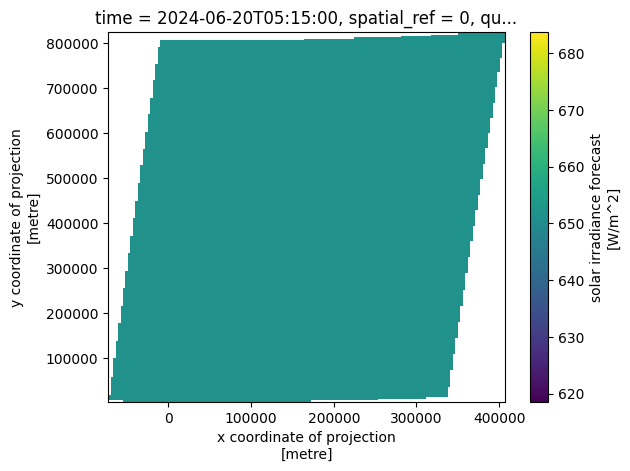

In [9]:
ds.isel(time=5, quantile=1)['irradiance'].plot()